In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [2]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py'

Starting script...
Removing existing file...
Ending script...


In [3]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')
data.head()

,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
id_str_twitter,23781146,15148309,927028057763995648,77648005,3429765093,10794662,1034514325644431361,529445600,12050562,62314491,18289937,172880784,18609547,2164986296,1026783544457273345,109604376
name,Fe Rebelatto,Sommelier de Airbnb,✪ Felippe,Conference Distinguished Specialist,Paula Santana,Maharaja of the Legacies,Jessica,"var nickname = ""Riquettinha"";",Roberta Arcoverde,Gabriela,Thamara Andrade,felipe.ts ⚡,Juan Lopes,Rafael Dantas,iagor com i,T̷o̷m̷o̷y̷o̷ ̷ F̷u̷r̷a̷c̷ã̷o̷
screen_name,rebelatto,Guilh_rm_,FelippeRegazio,NannoKa,psanrosa13,rponte,dev_jessi,Riquettinha,rla4,Gabrielathalita,thamyk,felipefialho_,juanplopes,RaffaelDantass,Iagor51,RafaelMansilha
location,"Rio de Janeiro, Brasil",somewhere in Brazil,,Ctba-PR Brasil,Brasil,"Ceará, Brazil",São Paulo - Brasil,"Belo Horizonte, Brasil","Sao Paulo, Brazil",Belo Horizonte,"Belo Horizonte, Brazil.",Dark Side of the Moon,"Rio de Janeiro, Brasil","São Paulo, Brasil",Pvh,"Palmas, Tocantins, Brasil"
url,None,https://t.co/gX4oRZWHg3,https://t.co/KkaPlVH4Wu,https://t.co/hDni4Fh2Ng,https://t.co/YJQuDtv2YW,https://t.co/3yZ94QNQvs,https://t.co/MtUeSEBICu,https://t.co/QU71LJgSuD,None,https://t.co/AmkOKWlftK,https://t.co/JWBzdmQOcV,https://t.co/yPuEuh1bn9,https://t.co/Uhw9rEUK2v,None,None,https://t.co/9cS34v6hKc


In [4]:
def create_tweets_pd(data, id_user):

    tweets_by_month = {}

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    del tweets_pd[0]
    del tweets_pd[1]
    del tweets_pd[4]
    del tweets_pd[5]
    del tweets_pd[6]
    del tweets_pd[18]
    del tweets_pd[19]
    del tweets_pd[20]
    
    tweets_pd.columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]
    
    tweets_pd['created_at'] = pd.to_datetime(tweets_pd['created_at'])
    tweets_pd['YearMonth'] = tweets_pd['created_at'].dt.year.astype(str) + "-" + tweets_pd['created_at'].dt.month.map("{:02}".format)
    return tweets_pd

In [5]:
def create_line_plot(df_result, id_user):

    x = df_result["YearMonth"]
    y = df_result["text"]

    tickvalues = range(0,len(x))

    fig = plt.figure(figsize=(10,6))

    plt.xticks(ticks = tickvalues ,labels = x, rotation = 'vertical')

    plt.title("Tweets per Month - Participant {}".format(id_user))
    plt.ylabel("Quantity of Tweets")
    plt.xlabel("Months")

    plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*0.05, max_ylim*1.1, 'Mean: {:.2f}'.format(y.mean()))

    plt.plot(x,y)

In [6]:
def create_histogram(df_result, id_user):

    x = df_result["YearMonth"]
    y = df_result["text"]
    
    fig = plt.figure(figsize=(10,6))

    n, bins, patches = plt.hist(y, bins='auto', color='#5643fd')

    plt.xticks(np.arange(0, 1000, 50))

    plt.axvline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(y.mean()))

    plt.title('Tweets Frequency per Month - Participant {}'.format(id_user))
    plt.xlabel('Quantity of Tweets')
    plt.ylabel('Frequency')

    plt.show()

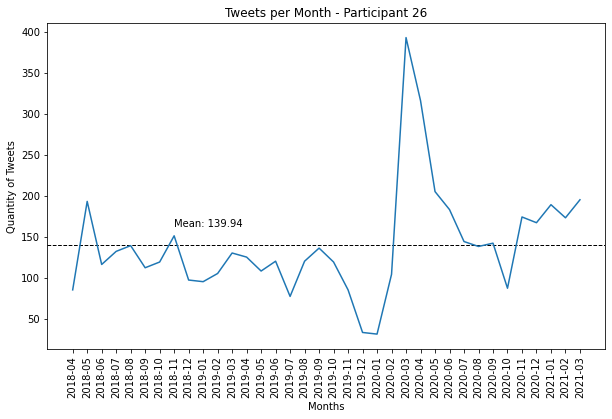

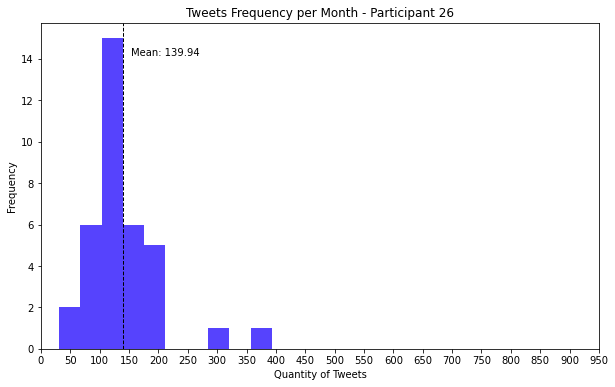

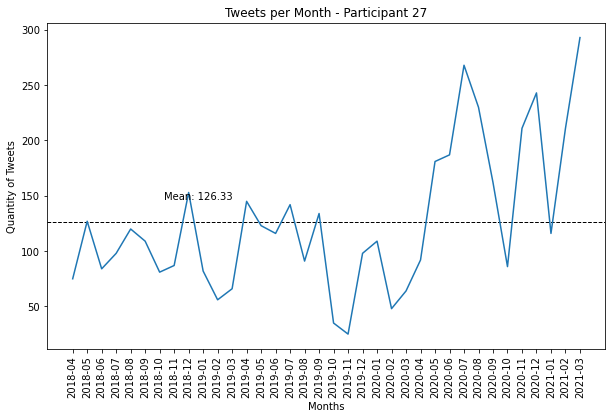

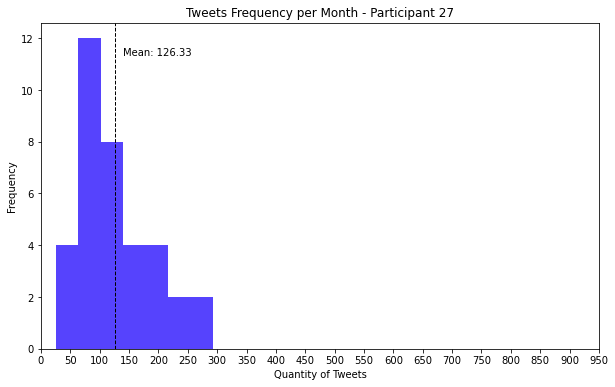

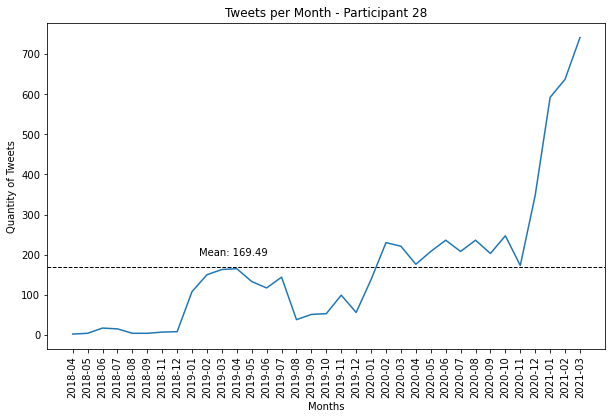

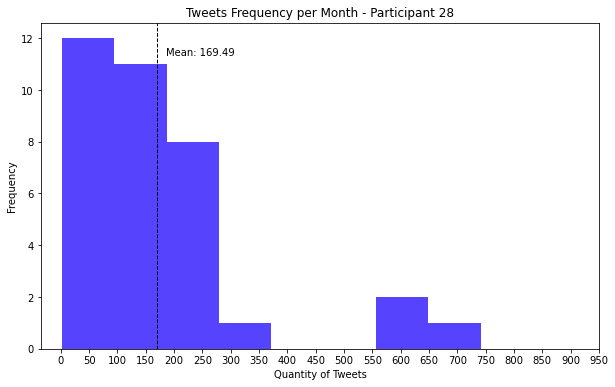

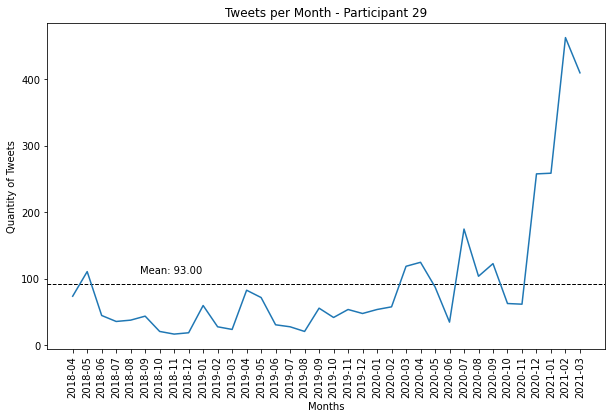

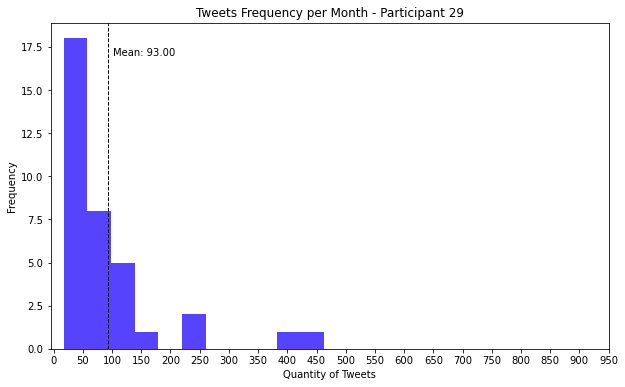

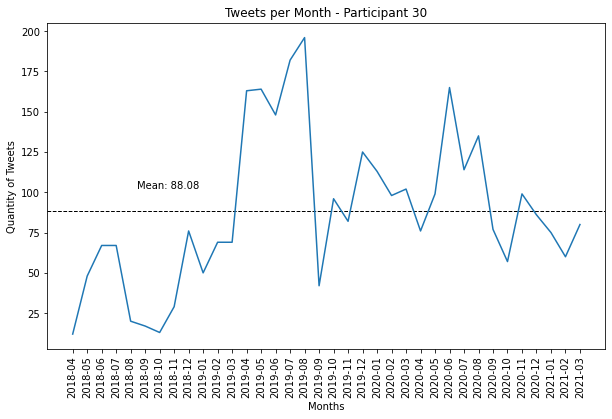

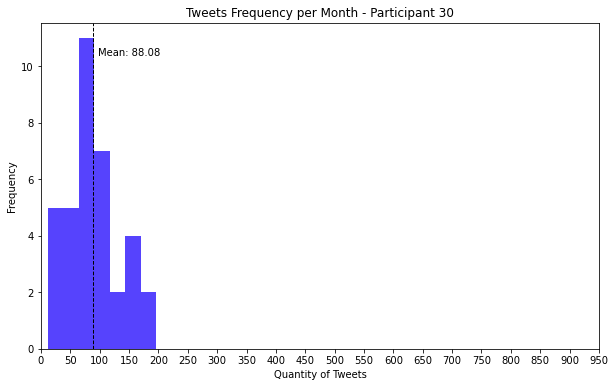

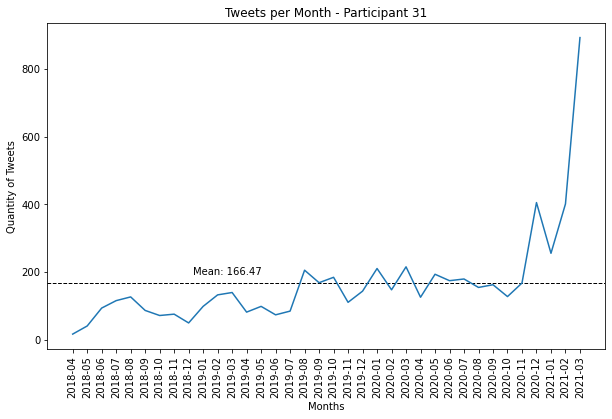

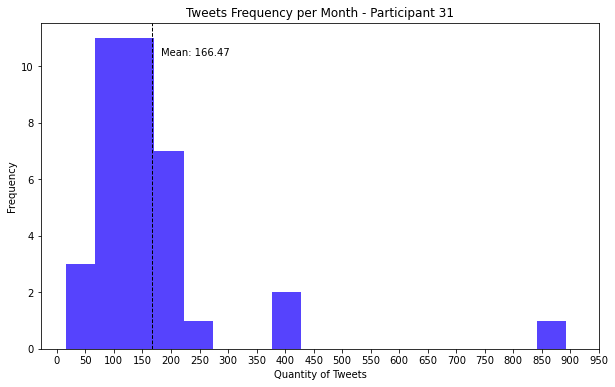

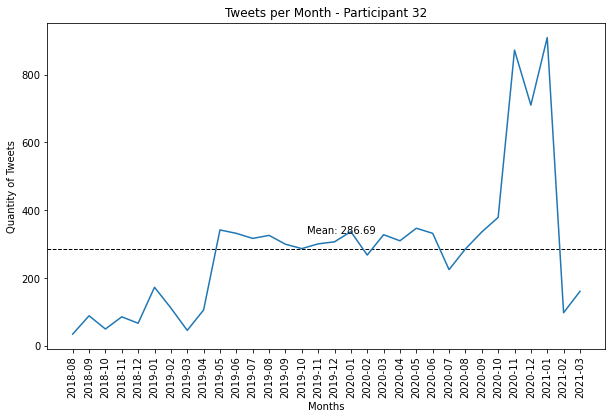

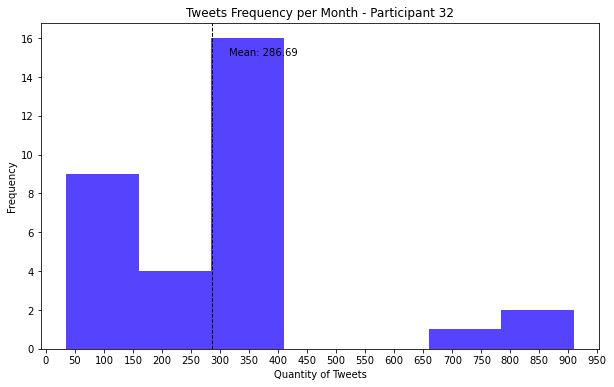

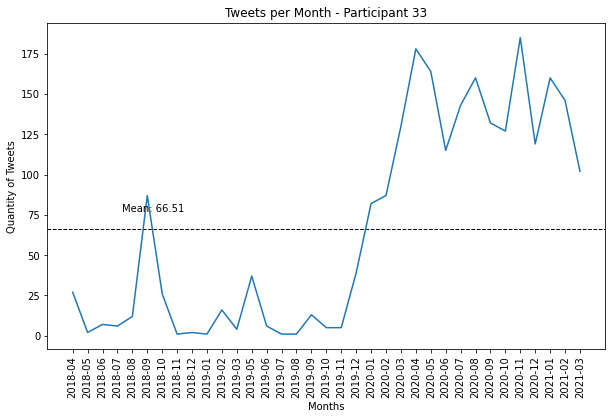

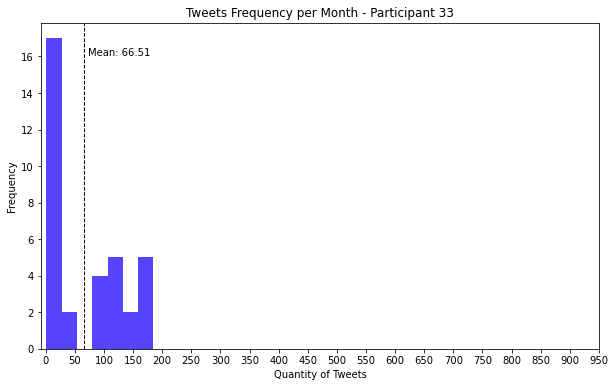

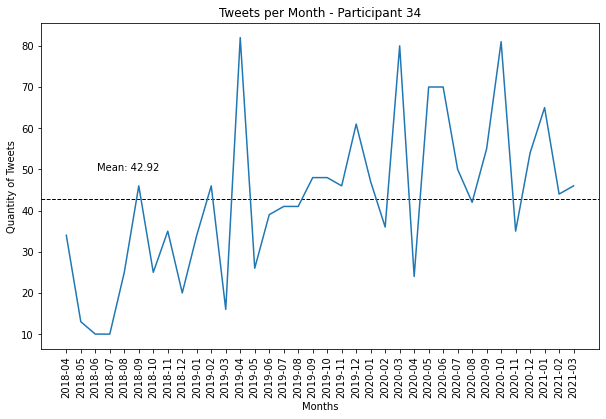

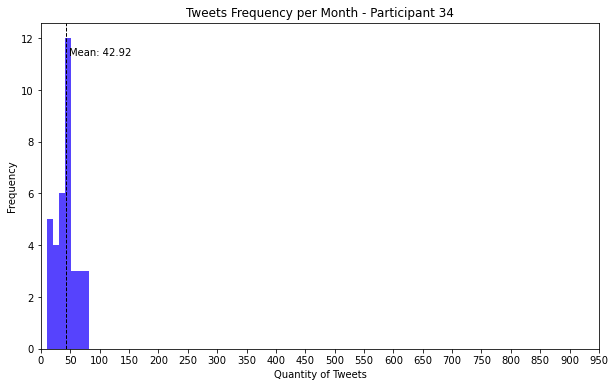

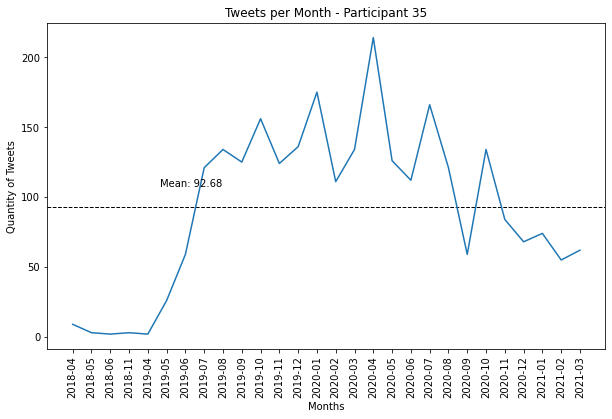

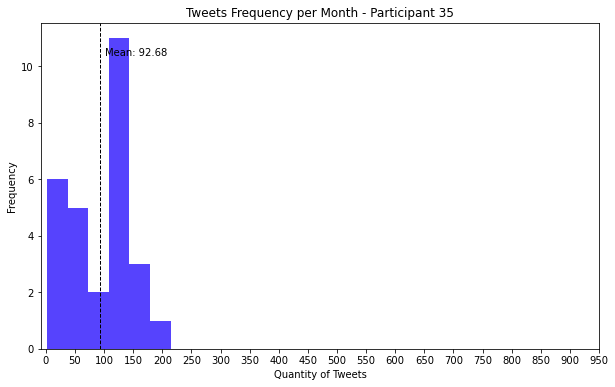

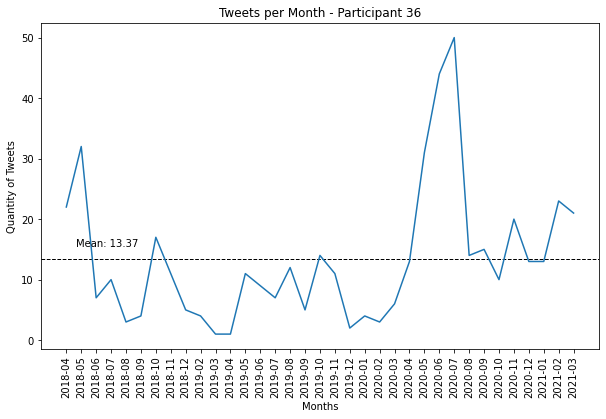

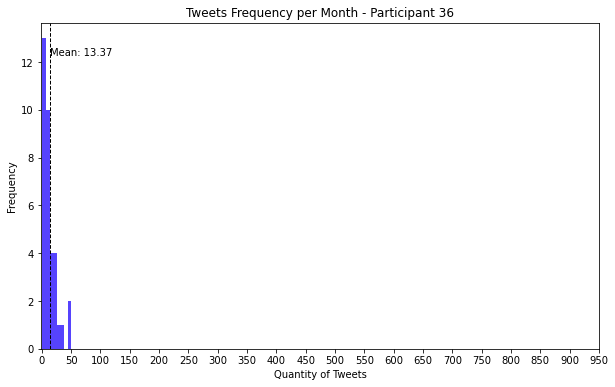

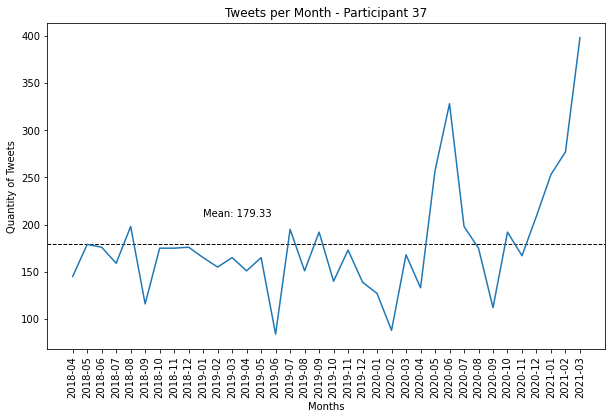

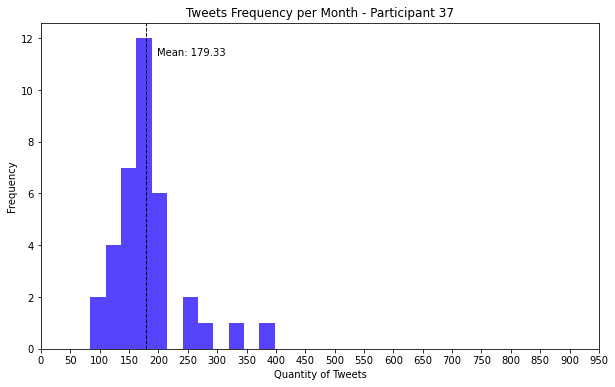

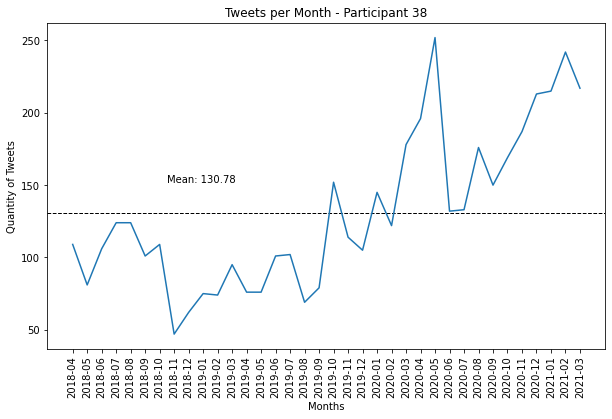

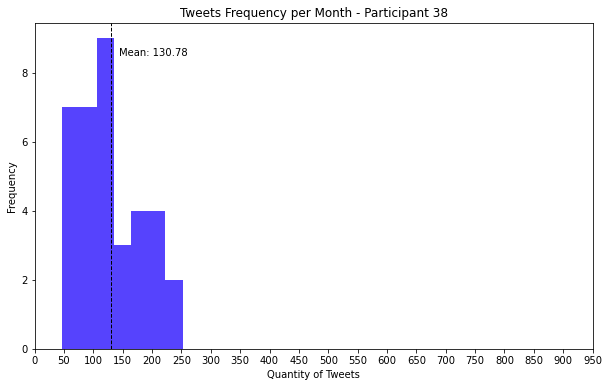

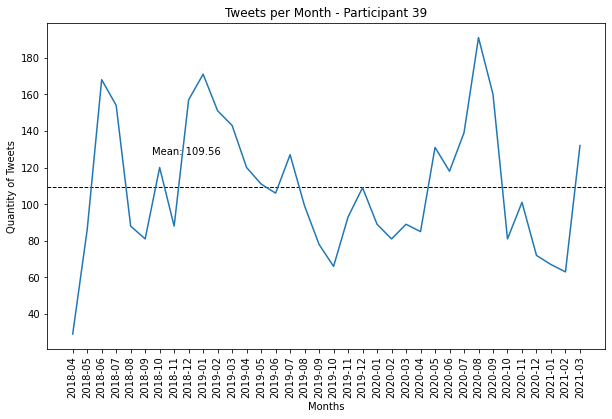

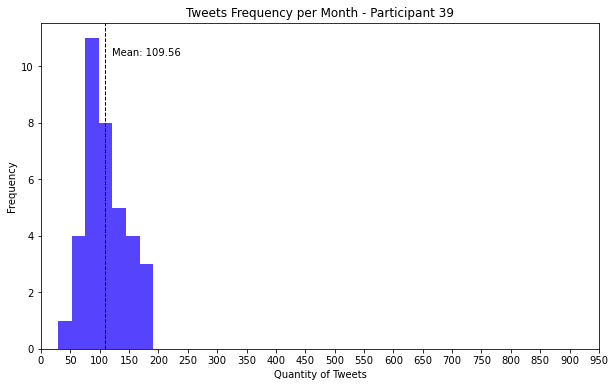

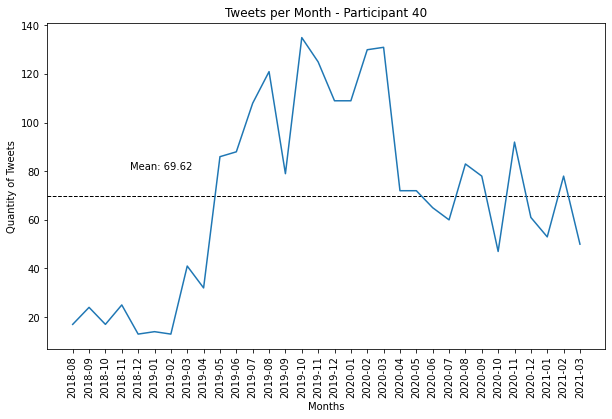

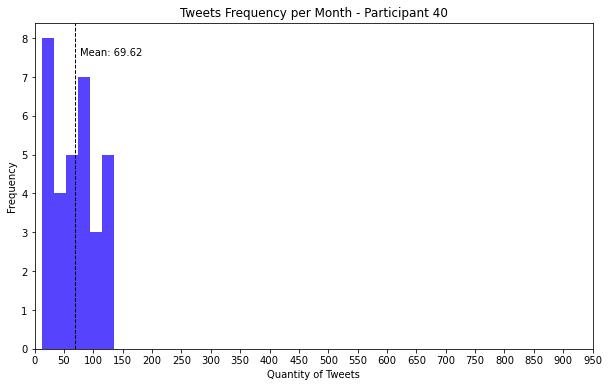

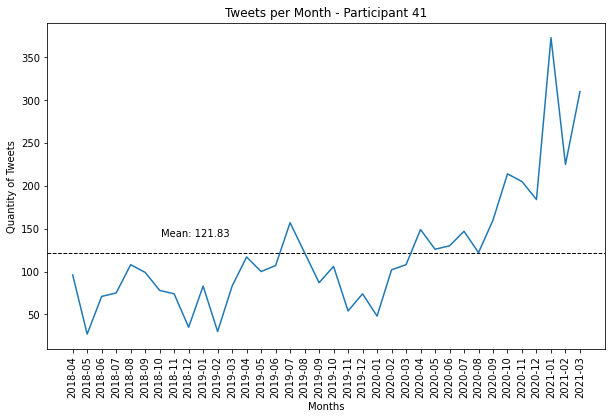

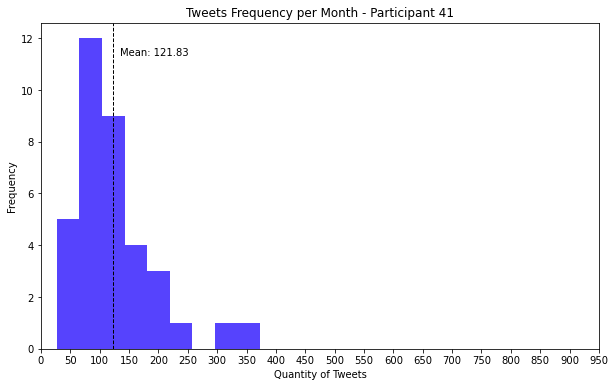

In [7]:
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)

    df = tweets_pd.groupby(tweets_pd["YearMonth"]).count()

    df_result = pd.DataFrame(df["text"])
    df_result["YearMonth"] = list(df_result.index)

    create_line_plot(df_result, id_user)
    create_histogram(df_result, id_user)

In [8]:
def totalize_data_by_month():
    df_result_all = {}
    all_df = []

    for c in data:
        id_user = c
        tweets_pd = create_tweets_pd(data, id_user)

        df = tweets_pd.groupby(tweets_pd["YearMonth"]).count()

        df_result = pd.DataFrame(df["text"])
        df_result["YearMonth"] = list(df_result.index)
        df_result_all = dict.fromkeys(list(df_result.index), 0)
        all_df.append(df_result)

    for d in df_result_all:
        for a in all_df:
            temp_df = a.loc[a['YearMonth']== d]
            if len(temp_df['text']) > 0:
                df_result_all[d] = df_result_all[d] + temp_df['text'][0]

    df_res = pd.DataFrame.from_records([df_result_all])
    df_res = df_res.transpose()
    return df_res

In [9]:
totalize_data_by_month().describe()

,0
count,36.000000
mean,1829.500000
std,837.646209
min,735.000000
25%,1120.000000
50%,1658.000000
75%,2375.000000
max,4111.000000


In [10]:
df = totalize_data_by_month()
df

,0
2018-04,735
2018-05,946
2018-06,969
2018-07,1001
2018-08,1057
2018-09,1019
2018-10,922
2018-11,911
2018-12,939
2019-01,1209


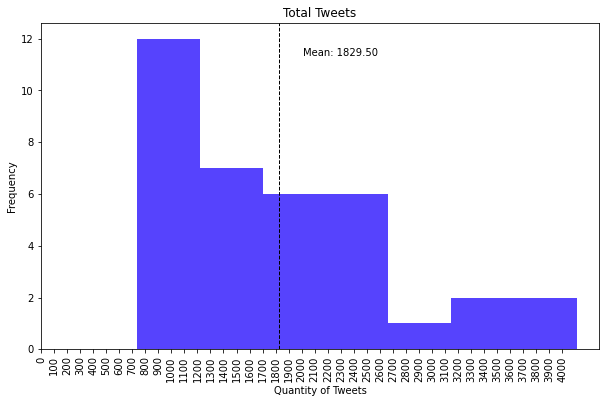

In [13]:
# HISTOGRAM OF TOTAL TWEETS, GROUPED BY MONTH

df = totalize_data_by_month()

fig = plt.figure(figsize=(10,6))

n, bins, patches = plt.hist(df, bins='auto', color='#5643fd')

plt.xticks(np.arange(0, 4001, 100), rotation = 'vertical')

plt.axvline(df.mean()[0], color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df.mean()[0]*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df.mean()[0]))

plt.title('Total Tweets')
plt.xlabel('Quantity of Tweets')
plt.ylabel('Frequency')

plt.show()

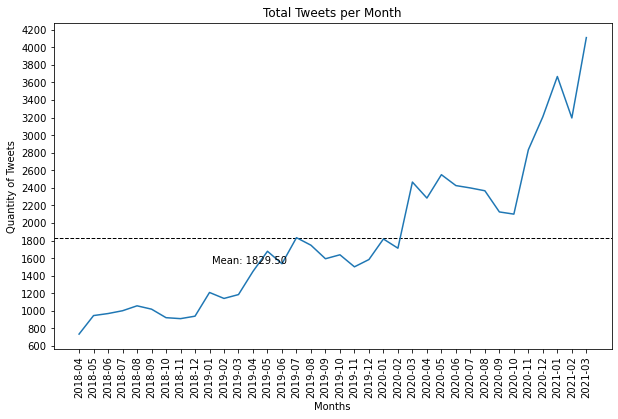

In [12]:
tickvalues = range(0,len(df.index))

fig = plt.figure(figsize=(10,6))

plt.xticks(ticks = tickvalues ,labels = df.index, rotation = 'vertical')
plt.yticks(np.arange(0, 5000, 200))

plt.title("Total Tweets per Month")
plt.ylabel("Quantity of Tweets")
plt.xlabel("Months")

plt.axhline(df.mean()[0], color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df.mean()[0]*0.005, max_ylim*0.32, 'Mean: {:.2f}'.format(df.mean()[0]))

plt.plot(df)